In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', 500)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-resources-data-set/HRDataset_v14.csv


In [2]:
data = pd.read_csv('../input/human-resources-data-set/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Human Resources Data Exploration - Beginner

This is my first Explatory Data Analysis, in this notebook I would be using Human Resources Dataset. In this notebook I am going to do 2 steps which are EDA, and Analysis Data with the questions from the Dataset. 
It is very much welcome to give me insight, question, critic to help me improve my analysis skill along with Data Visualization. 

## A. Exploratory Data Analysis

In this section, we will do these steps:
- A.1 Identification of variables and data types.

## B. Analysis Data and Data Visualization

This is my first Eploratory Data Analysis using Human Resources Data Set. In this notebook I am going to explore the data according the questions that has been set along with the data set which are: 


- B.1 Is there any relationship between who a person works for and their performance score?
- B.2 What is the overall diversity profile of the organization?
- B.3 What are our best recruiting sources if we want to ensure a diverse organization?
- B.4 Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?
- B.5 Are there areas of the company where pay is not equitable?


### A. Exploratory Data Analysis
- A.1 Identification of variables and data types.



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## B. Analysis Data
### **B.1 Is there any relationship between who a person works for and their performance score?**



In [4]:
grouped_data = data.groupby(['ManagerName','PerformanceScore']).size().reset_index()
grouped_data.columns = ['ManagerName','PerformanceScore','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'ManagerName', y = 'Count', color='PerformanceScore', title = 'Performance Score of Employee & The Managers')
fig.show()



Summary of the graph:
1. Over 50 percent of the Employee from Each Manager has Fully Meets Performance Score
2. 3 out of 21 Managers's Employee have Fully Meets Performance Score only
3. Over 14 Manager's Employee has Exceeds Performance Score, Brannon's Employee has the highest number of Exceeds.
4. 7 out of 21 Managers are having PIP to over their employee
5. Michael Albert has the highest number of Needs Imporvement Score over other 12 Manager's Employee


### B.2 What is the overall diversity profile of the organization?

In this section, to measure the overall diversity, I would check based on **Sex, Citizenship, Race** towards the **whole organization, cross departments and positions**

Ps: Still haven't figured the parameter of diversity, is there any sort of specific number of each diversity factors that the organization should meet in order to achieved the diversity ?

### * Diversity of the whole organization 
Based on Sex, Citizenship, Race

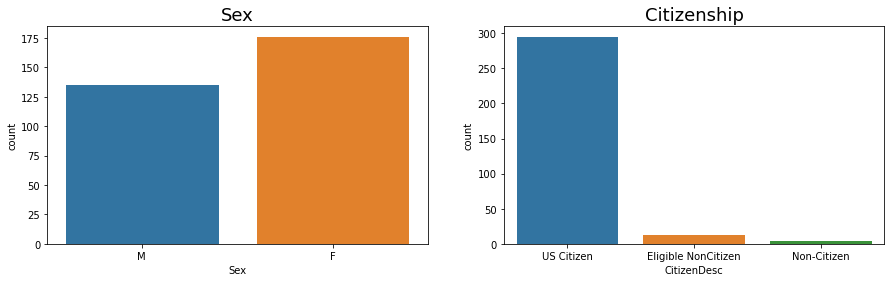

In [5]:
plt.figure(figsize=(15,4))

plt.subplot(121)
plt.title('Sex', fontsize=18)
sns.countplot(x = 'Sex', data = data)

plt.subplot(122)
plt.title('Citizenship', fontsize=18)
sns.countplot(x="CitizenDesc", data = data)




plt.show()

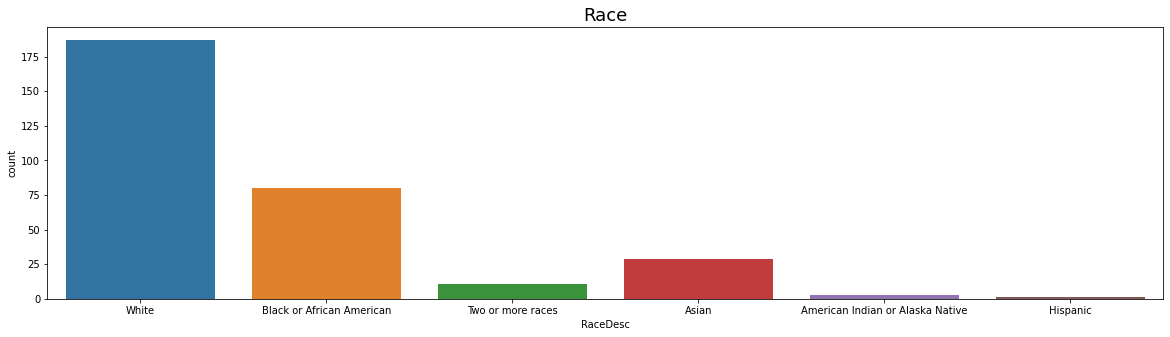

In [6]:
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.title('Race', fontsize=18)
sns.countplot(x="RaceDesc", data = data)

#### Summary

Diversity for the whole organization 
1. Sex : Female are the highest number employee than Male Employee
2. Citizenship : They are 3 Citizenship which are following in order from the biggest to the smallest number of Citizenship status US, Eligible NonCitizen and Non-Citizen. 
3. Race : They are 6 Races which are following in order from the biggest number to the smallest number of Races  White, Black or African American, Asian, Two or more races, American Indian or Alaska Native, Hispanic

###   * Diversity cross Department
Based on Sex, Citizenship, Race



In [7]:
grouped_data = data.groupby(['Sex','Department']).size().reset_index()
grouped_data.columns = ['Sex','Department','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Department', y = 'Count', color='Sex', title = 'Numbers of Sex accross Department')
fig.show()

In [8]:
#Race/Nationality/Citizenship
grouped_data = data.groupby(['CitizenDesc','Department']).size().reset_index()
grouped_data.columns = ['CitizenDesc','Department','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Department', y = 'Count', color='CitizenDesc', title = 'Citizenship of Empoyee accross Department')
fig.show()

In [9]:
#Race/Nationality/Citizenship
grouped_data = data.groupby(['RaceDesc','Department']).size().reset_index()
grouped_data.columns = ['RaceDesc','Department','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Department', y = 'Count', color='RaceDesc', title = 'Race of Employee accross Department')
fig.show()

#### Summary

Diversity accross Department 
1. Sex : All department have Female Employee including Executive Office which there is no Male in that department. 
2. Citizenship : Mostly US Citizen working all over department, Eligible Non-citizen have a place in Production, IT, Sales, and Software Engineering, which Non-Citizen mostly working under Production, and Software Engineering 
3. Race : 
    * White employee has their position all over the Department, 
    * Black or African-American has their place almost to all Department except Executive Office, 
    * Asian Employee have the same distribution as Black or African American except Admin Office, 
    * Moreover, Hispanic have their place working under Production
    * American Indian or Alaska Native are working under Production and Sales as the same as Two More Race Employee
    

### * Diversity across Position 
Based on Sex, Citizenship, Race

In [10]:
grouped_data = data.groupby(['Sex','Position']).size().reset_index()
grouped_data.columns = ['Sex','Position','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Position', y = 'Count', color='Sex', title = 'Numbers of Sex of Employee accross Position')
fig.show()

In [11]:
grouped_data = data.groupby(['RaceDesc','Position']).size().reset_index()
grouped_data.columns = ['RaceDesc','Position','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Position', y = 'Count', color='RaceDesc', title = 'Race of Employee accross Position')
fig.show()

#### Summary

Diversity accross Positions (They are 32 Positions)
1. Sex : The majority of Manager Positions in technical area occupied by Male whereas President&CEO, and Director of sales run by Female Employee. 
3. Race : 
    * White employee are working within 24 positions out of 32, 
    * Black or African-American has 22, 
    * Asian Employee mostly working under Technical which are 8 positions out of the total positions 
    * Moreover, Hispanic working as a Production Manager
    * American Indian or Alaska Native are working under Production Technician and Area Sales Manager
    * Two More Race Employee works with 3 positions which are production technician and Area Sales Manager
    

### 2.C What are our best recruiting sources if we want to ensure a diverse organization?

In [12]:
m = data.groupby(['RecruitmentSource']).size().reset_index()
m.columns = ['RecruitmentSource','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.pie(m, values='Distributions', names='RecruitmentSource')
fig.show()

In [13]:
m = data.groupby(['RecruitmentSource', 'Sex']).size().reset_index()
m.columns = ['RecruitmentSource','Sex','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.bar(m, x='RecruitmentSource', y='Distributions', color='Sex')
fig.show()

In [14]:
m = data.groupby(['RecruitmentSource', 'RaceDesc']).size().reset_index()
m.columns = ['RecruitmentSource','RaceDesc','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.bar(m, x='RecruitmentSource', y='Distributions', color='RaceDesc')
fig.show()

### 2.D Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?

- Visualize the pie chart of The Reason why employees got terminated? 
- Then check the biggest part of The Reason why variable and tracking down when they were hired and got fired, how much is their pay salary, how long  
- Check the TermReason through Sex, PayRate, PerformanceScore, Department, Position, EngagementSurvey, EmpSatisfaction, SpecialProjectsCount


In [15]:
m = data.groupby(['TermReason']).size().reset_index()
m.columns = ['TermReason','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.pie(m, values = 'Distributions', names = 'TermReason')
fig.show()

In [16]:
m = data.groupby(['TermReason', 'Department']).size().reset_index()
m.columns = ['TermReason','Department','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.bar(m, x = 'TermReason', y = 'Distributions', color = 'Department', title='Terminated Reason Vs Department')
fig.show()

In [17]:
a = data[data['TermReason'] == 'Another position']
m = a.groupby(['TermReason', 'Sex']).size().reset_index()
m.columns = ['TermReason','Sex', 'Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.pie(m, values = 'Distributions', names = 'Sex')
fig.show()

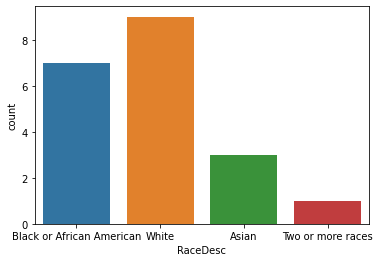

In [18]:
a = data[data['TermReason'] == 'Another position']
sns.countplot(x="RaceDesc", data = a)